

## SymPy

La librairie [SymPy](http://docs.sympy.org/latest/index.html) est un outil très puissant permettant de faire du calcul symbolique. Cela signifie que les objets mathématiques sont représentés exactement, et non approximativement, et que les expressions mathématiques avec des variables non évaluées sont laissées sous forme symbolique.

Avant de commencer, assurez vous d’avoir sympy d'installé. Vous pouvez l’installer via pip :
```
pip install sympy
```
Nous devons ensuite importer la librairie pour pouvoir l'utiliser. Une façon simple de configurer SymPy et d'avoir déjà certaines variables courantes de définies est d'utiliser la fonction init_session() qui importera automatiquement tout de SymPy, créera des symboles courants, configurera l'affichage graphique et exécutera init_printing() qui permet un affichage agréable de mathématiques.

In [1]:
from sympy import init_session
init_session() 

IPython console for SymPy 1.13.3 (Python 3.11.3-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



In [2]:
plot(x**2, (x, -5, 5))

Dans le code ci-haut, la commande `symbols()` permet d'indiquer que les différents symboles doivent être traiter comme des variables mathématiques. On peut définir une nouvelle variable de la façon suivante :

In [3]:
w=symbols('w')

On peut maintenant faire des opérations algrébriques à partir de ces symboles. La plupart des fonctions mathématiques usuelles sont disponibles dans Sympy.

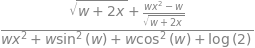

In [4]:
expression1=((w*x**2-w)/sqrt(2*x+w)+sqrt((2*x+w)))/(w*x**2+w*cos(w)**2+w*sin(w)**2+log(2)) #remarquez que pour faire un exposant, on utilise ** et non ^
expression1 #affiche l'expression

Par défaut, les fonctions trigonométriques utilisent les radians et la fonction `log`, comme dans la plupart des langages de programmation, est le logarithme naturel.

Sympy nous permet de réaliser de nombreuses opérations mathématiques qui seraient fastidieuses à faire à la main. Par exemple, on peut simplifier une expression :

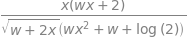

In [5]:
expression1.simplify() #simplifie l'expression

Ou encore développer ou factoriser une expression :

In [6]:
polynome1=(2*x+1)**5 #un polyôme de degré 5 factorisé
polynome1.expand() #développe le polynôme

In [7]:
factor(108*w**5-45*w**3+5*w**2+5*w-1) #factorise un polynôme

Sympy nous permet également de résoudre des équations. La fonction `solve` permet de trouver les racines (les zéros) d'une expression. Le premier paramètre de la fonction est l'expression dont on cherche les zéros et le second paramètre est la variable pour laquelle on veut résoudre. La ou les solutions retourner sont sous forme de liste.

In [8]:
solve(expression1,w) #résoud l'équation expression1=0 en w

In [9]:
x1=solve(expression1,x)[0] #résoud l'équation expression1=0 en x et attribue la première solution à x1
x1

Pour évaluer une expression lorsque les variables qu'elle contient doivent être remplacer par d'autres expressions ou par des valeurs spécifiques, on doit utiliser la méthode `subs()`.

In [10]:
polynome1.subs(x,10) #remplace w par 10 dans le polynôme polynome1

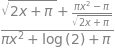

In [11]:
expression1.subs(w,pi) #remplace w par la constante pi dans l'expression1

In [12]:
expression1.subs(x,x1) #remplace x par x1 trouver plus haut dans l'expression1

On peut aussi résoudre des équations spécifique en définissant une équation à l'aide de la fonction `Eq(coté_gauche,coté_droit)`. En effet, les symboles `=` et `==` ne permettent pas de définir une équation puisqu'ils sont déjà utilisés par Python pour autre chose. C'est une caractéristique de base de la librairie Sympy, elle ne change jamais le comportement habituel du langage Python.

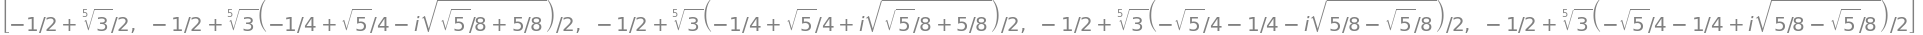

In [13]:
solve(Eq(polynome1,3),x) #résoud l'équation polynome1=2 en x

On peut voir dans les solutions précédentes que certaines solutions comportent une variable `i`. C'est que Sympy défini par défaut des variables comme faisant partie des nombres complexes qui sont une généralisation des nombres réels. Comme nous ne traitons pas les nombres complexes dans ce cours, nous pouvons soit ignorer ces solutions, soit définir nos variables comme faisant partie des réels.

In [14]:
u = Symbol('u',real=True) #u sera mainenant traité comme une variable mathématique réelle

In [15]:
solve(Eq(polynome1.subs(x,u),3),u) #résoud l'équation polynome1=2 après avoir remplacé x par u

# Calcul différentiel

Regardons maintenant les principales opérations que l'on veut faire en calcul différentiel. Nous allons travailler avec la fonction : 
$$
f(x) = xe^{x}.
$$
Commençons par la définir.

In [16]:
f=x*exp(x) #on définit une fonction f à partir de x qui est déja défini comme un symbole. La fonction exponentielle est définie par exp().
f

On peut évaluer la fonction :

In [17]:
f.subs(x,2) #on remplace x par 2 dans la fonction f

Par défaut, les valeurs renvoyés sont sous formes exactes. On peut avoir une approximation numérique à l'aide de la fonction `N()`.

In [18]:
N(f.subs(x,2)) #on remplace x par 2 dans la fonction f et on évalue le résultat numériquement

On peut évaluer des limites à l'aide de la fonction `limit(fonction,variable,valeur)`. Par exemple, si on veut évaluer
$$
\lim_{{x \to -\infty}} f(x).
$$

In [19]:
limit(f, x,-oo) #on calcule la limite de f en x tendant vers -infini. 

On sait donc que l'on est en présence d'une asymptote horizontale en `y=0`! On peut aussi mettre `oo` pour évaluer la limite à l'infini ou une valeur numérique.

In [20]:
limit(f,x,oo) #on calcule la limite de f en x tendant vers +infini

In [21]:
limit(f,x,3) #on calcule la limite de f en x tendant vers 3

On peut facilement dériver une fonction à l'aide de la méthode `diff(variable)`.

In [22]:
f1=f.diff(x) #on définit f1 comme la dérivée de f par rapport à x
f1

On peut ensuite trouver facilement les zéros de la dérivée.

In [23]:
solve(f1,x) #on résoud l'équation f1=0 en x

La fonction `diff(variable,n)` permet également d'obtenir la n-ième dérivée de la fonction. 

In [24]:
f2=f.diff(x,2) #on définit f2 comme la dérivée seconde de f par rapport à x 
f2

Sympy permet également de tracer facilement une fonction à l'aide de la fonction `plot(fonction,(variable,valeur_min,valeur_max))`.

In [25]:
plot(f) #on trace le graphe de f en x allant de -5 à 5